In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
wine = load_wine()
X = wine.data
y = wine.target
wine_df = pd.DataFrame(data=np.c_[X, y], columns=np.append(wine.feature_names, 'target'))



In [3]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [4]:
class_counts = wine_df['target'].value_counts()
print("\nNumber of data points in each class:")
print(class_counts)


Number of data points in each class:
target
1.0    71
0.0    59
2.0    48
Name: count, dtype: int64


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

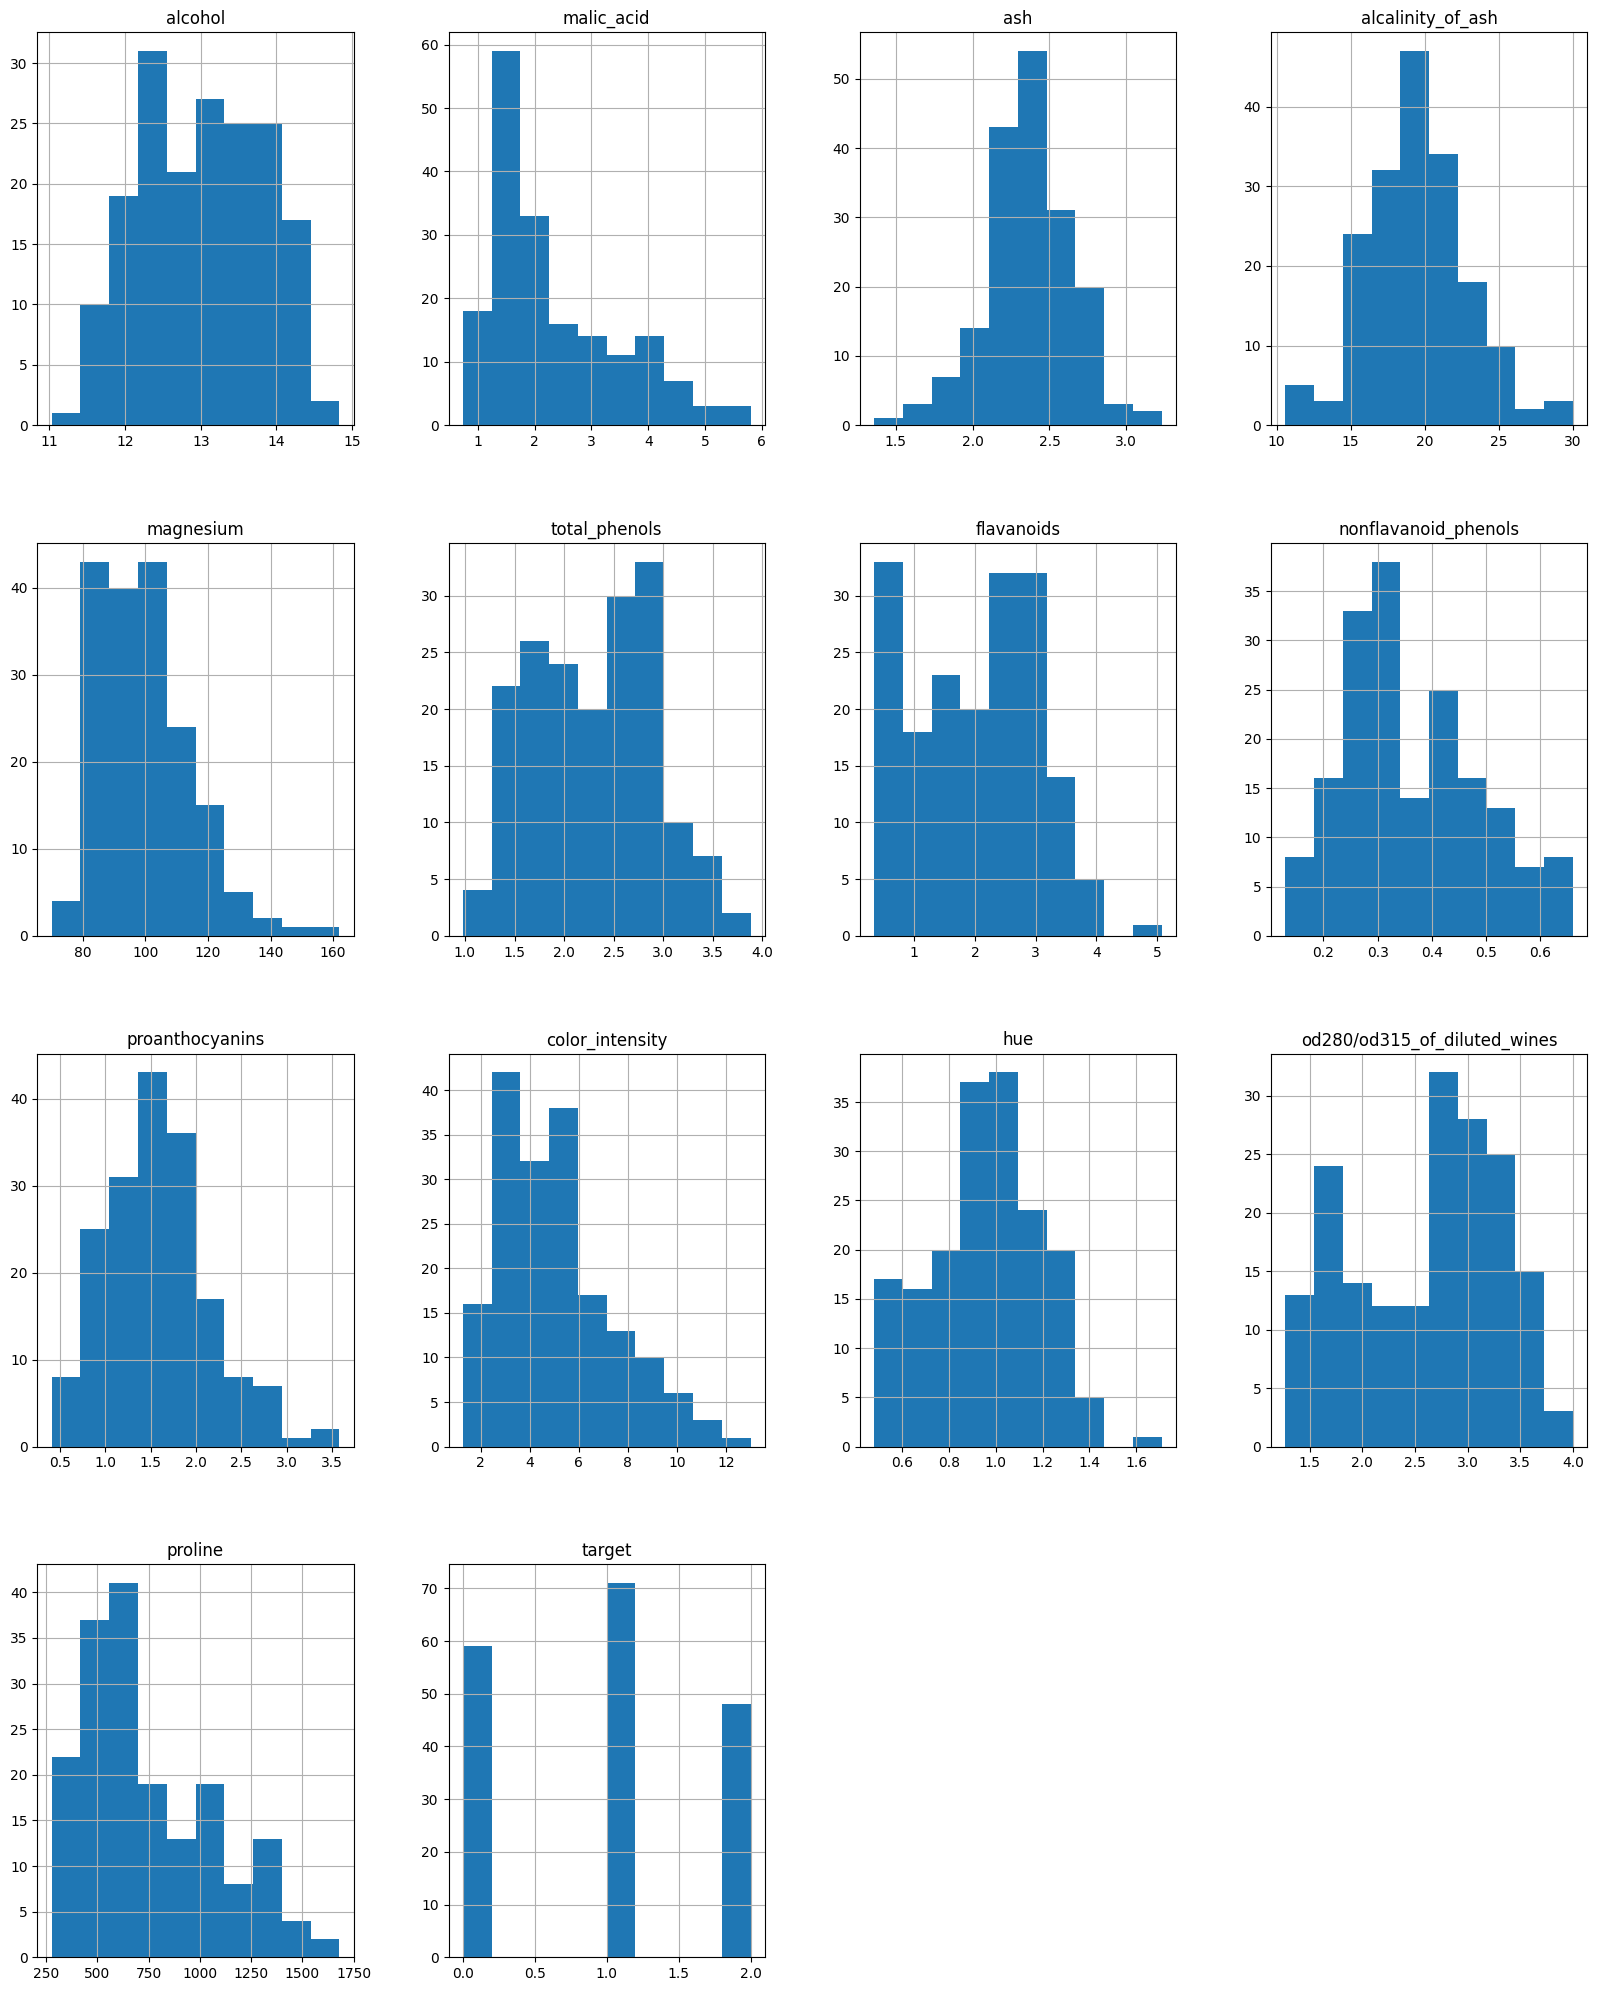

In [5]:
wine_df.hist(figsize=(20,25))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [8]:
model = AdaBoostRegressor(random_state=42)
model.fit(X_scaled, y_train)

AdaBoostRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_scaled)

In [10]:
accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
class_report = classification_report(y_train, y_pred)

In [11]:
print("Accuracy:", accuracy)


Accuracy: 1.0


In [12]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        40

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



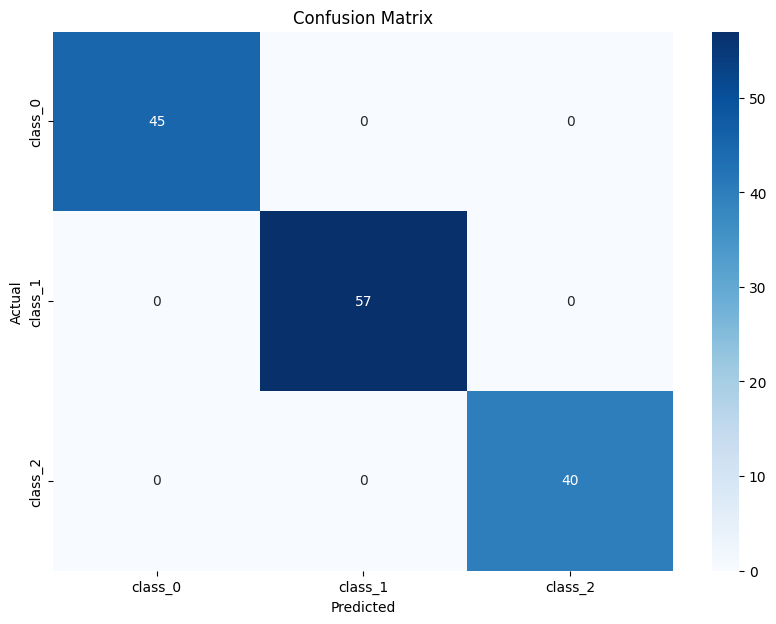

In [13]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
X_scaled = scaler.fit_transform(X_test)
y_pred = model.predict(X_scaled)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [16]:

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



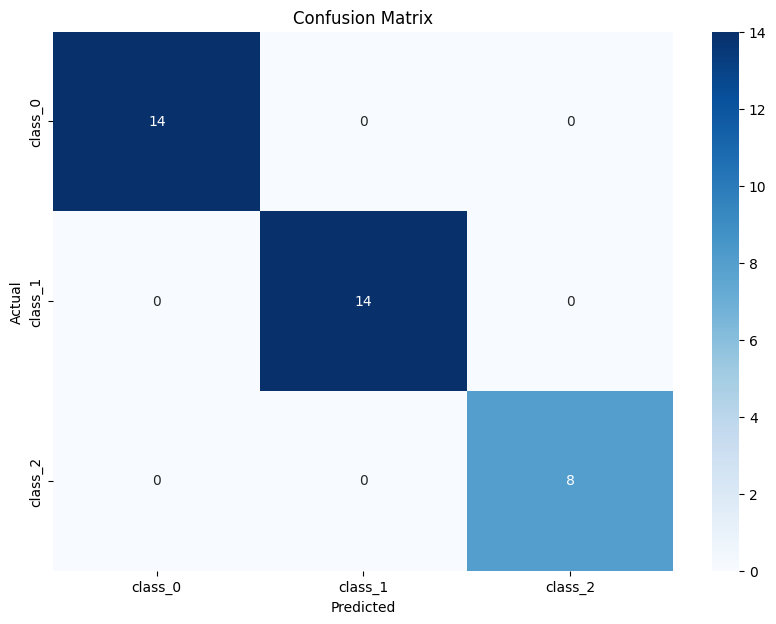

In [17]:

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()